In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import ops_plotall, ops_plotsubset, ops_plot_acp_inits, ops_plot_timing_inits, ops_plot_timing_inits_L2, get_prc, plot_pcr
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()
peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
p_list = []
for i in range(3,len(peaks)):
    p_list.append(peaks[i]- peaks[i-1])
period = np.mean(p_list)*dt

savepath = ('..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images_ops' + os.sep + 'sc2' + os.sep )

savepath_subset = ( '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                        'paper2_chaos' + os.sep + 'opt_phase_shift' + os.sep + 'images' + os.sep + 'sc2' + os.sep )

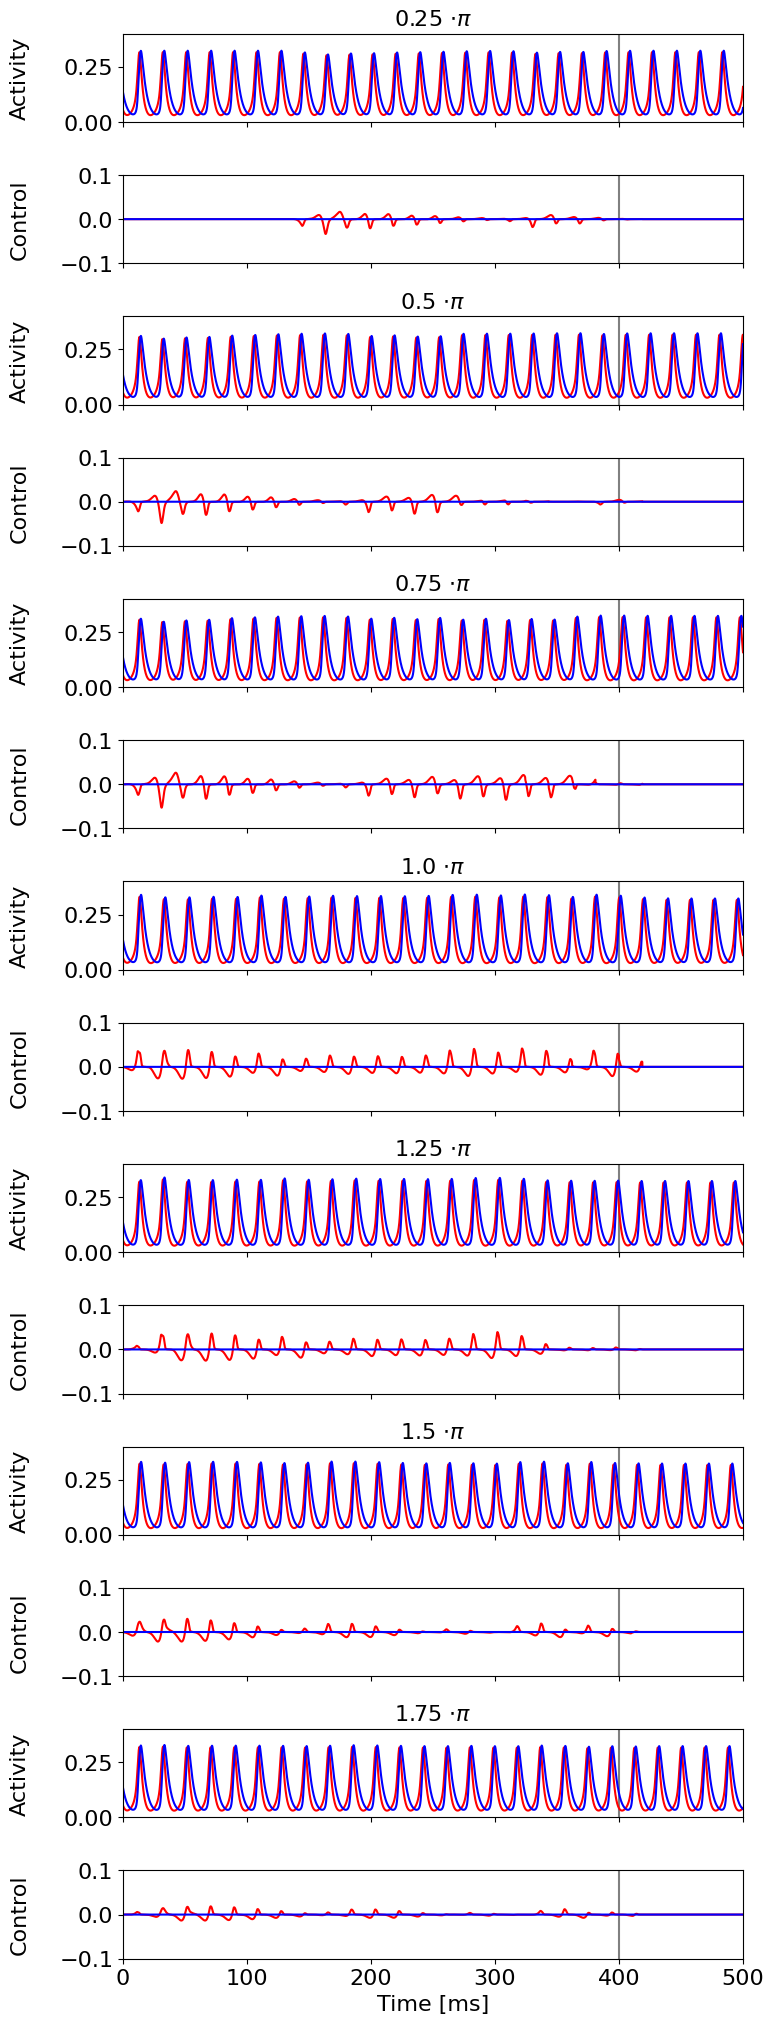

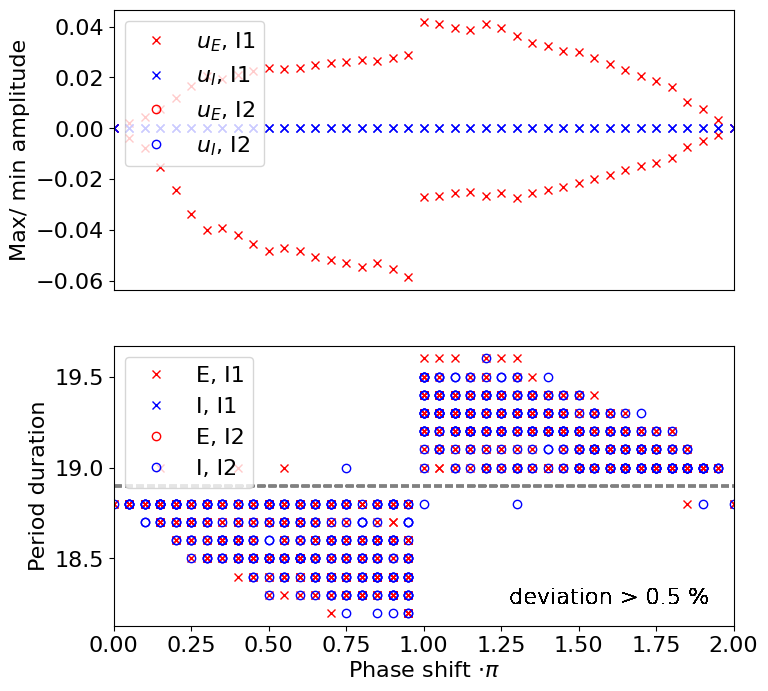

In [28]:
duration = 500.
dt=0.1

filehandler = open("results_min_w1.pickle","rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open("results_peak_w1.pickle","rb")
results_peak_w1 = pickle.load(filehandler)
filehandler.close()

for i_w in range(len(results_min_w1["w1"])):
    if i_w != 1:
        continue
    #ops_plotall(results_min_w1["control"][i_w], 0.25, duration, dt, 400., results_min_w1["filename"][i_w], savepath)
    ops_plotsubset(results_min_w1["state"][i_w], results_min_w1["control"][i_w], 0.4, 0.1, duration, dt, 400., 
                results_min_w1["filename"][i_w], savepath_subset)
    #ops_plotall(results_peak_w1["control"][i_w], 0.25, duration, dt, 400., results_peak_w1["filename"][i_w], savepath)

ops_plot_acp_inits(results_min_w1, None, period, 0.005, dt, "plot1", savepath)
ops_plot_timing_inits(results_min_w1, None, dt, [0,450], 200., "plot2", savepath)

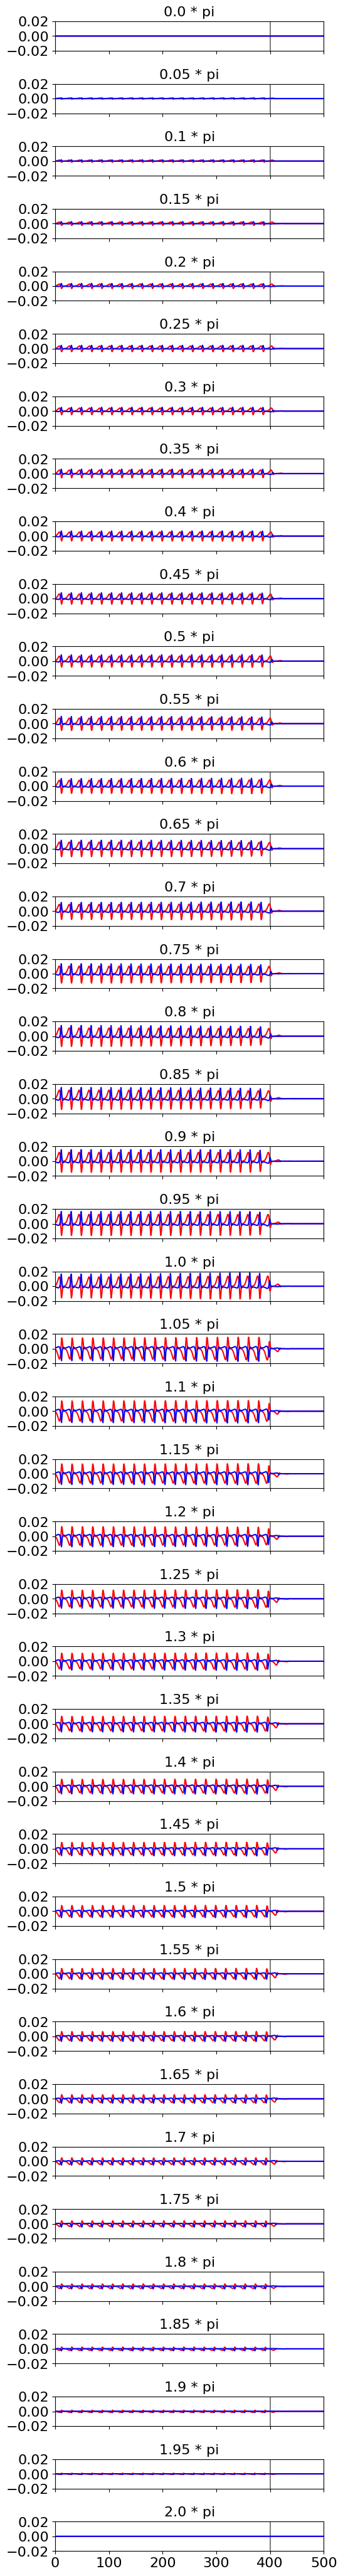

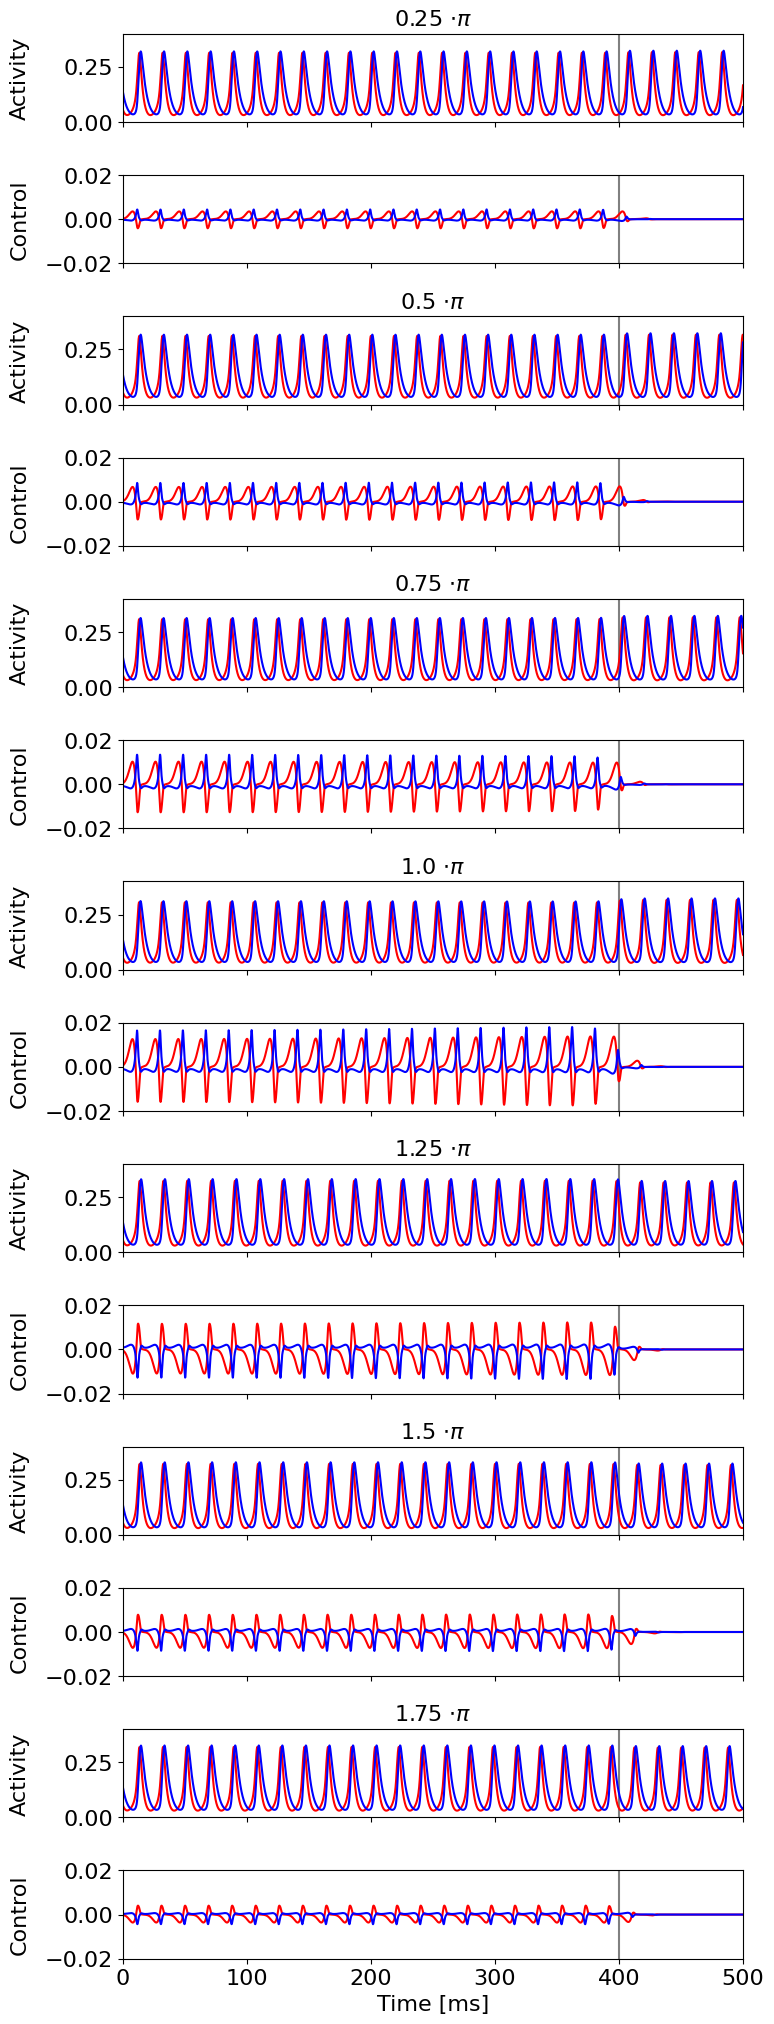

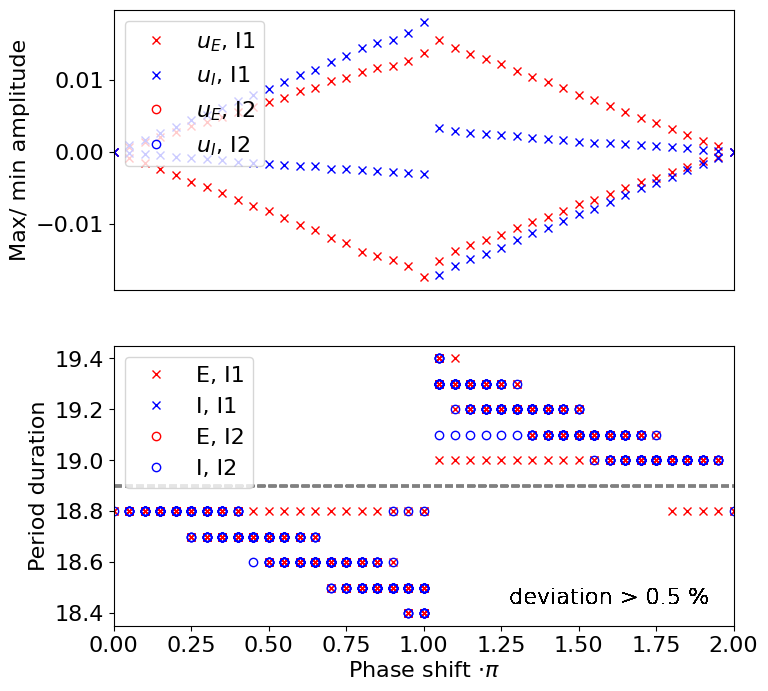

IndexError: tuple index out of range

In [29]:
duration = 500.
dt=0.1

filehandler = open("results_min_w2.pickle","rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

#filehandler = open("results_peak_w2.pickle","rb")
#results_peak_w2 = pickle.load(filehandler)
#filehandler.close()

for i_w in range(len(results_min_w2["w2"])):
    if i_w != 1:
        continue
    ops_plotall(results_min_w2["control"][i_w], 0.02, duration, dt, 400., results_min_w2["filename"][i_w], savepath)
    ops_plotsubset(results_min_w2["state"][i_w], results_min_w2["control"][i_w], 0.4, 0.02, duration, dt, 400., 
                results_min_w2["filename"][i_w], savepath_subset)
    #ops_plotall(results_peak_w2["control"][i_w], 0.25, duration, dt, 400., results_peak_w2["filename"][i_w], savepath)

ops_plot_acp_inits(results_min_w2, None, period, 0.005, dt, "plot1_w2", savepath)
ops_plot_timing_inits_L2(results_min_w2, None, dt, [0,450], 200., "plot2_w2", savepath)

In [35]:
wc = WCModel()
dist_array = [100.]

ep, em, ip, im, epim, emip, period = get_prc(wc, [1., 0.], dist_array)

In [68]:
dt = 0.01

for i in range(len(dist_array)):
    min0, min1 = np.amin(np.abs(ep[i,:1000])), np.amin(np.abs(ep[i,1000:]))
    i0 = np.where(min0 == ep[i,:1000])
    i1 = np.where(min1 == ep[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("E+")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f"% ((i00 +2+ i11)/2, i00+2.-i11))

    min0, min1 = np.amin(np.abs(em[i,:1000])), np.amin(np.abs(em[i,1000:]))
    i0 = np.where(min0 == em[i,:1000])
    i1 = np.where(min1 == em[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("E-")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f" % ((i00 +2+ i11)/2, i00+2.-i11))
    print("----------------------------------------")

    min0, min1 = np.amin(np.abs(ip[i,:1000])), np.amin(np.abs(ip[i,1000:]))
    i0 = np.where(min0 == ip[i,:1000])
    i1 = np.where(min1 == ip[i,1000:-100])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("I+")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f"% ((i00 +2+ i11)/2, i00+2.-i11))

    min0, min1 = np.amin(np.abs(im[i,:1000])), np.amin(np.abs(im[i,1000:]))
    i0 = np.where(min0 == im[i,:1000])
    i1 = np.where(min1 == im[i,1000:])

    i00 = i0[0][0] *2/(period/dt)
    i01 = i0[0][-1] *2/(period/dt)
    i10 = (i1[0][0]+1000) *2/(period/dt)
    i11 = (i1[0][-1]+1000) *2/(period/dt)

    print("I-")

    print(f"advance : %5.4f, %5.4f" % ( (i10 + i01)/2, i10-i01) )
    print(f"delay : %5.4f, %5.4f" % ((i00 +2+ i11)/2, i00+2.-i11))
    print("----------------------------------------")

E+
advance : 1.0247, 1.3688
delay : 2.0085, 0.5726
E-
advance : 1.2306, 0.9592
delay : 1.9126, 0.3461
----------------------------------------
I+
(array([443, 444, 445, 446, 447, 448, 449, 450, 451, 452]),)
advance : 0.8242, 1.4794
delay : 1.7868, 0.4263
I-
advance : 1.0832, 0.0011
delay : 1.8291, 0.4263
----------------------------------------


advance E+ max =  [1.21276163]
delay E+ max =  []
advance E- max =  [1.89121452]
delay E- max =  [1.43602249]
advance I+ max =  [1.74598659]
delay I+ max =  [1.13039355]
advance I- max =  [0.82909978]
delay I- max =  [1.87604145]


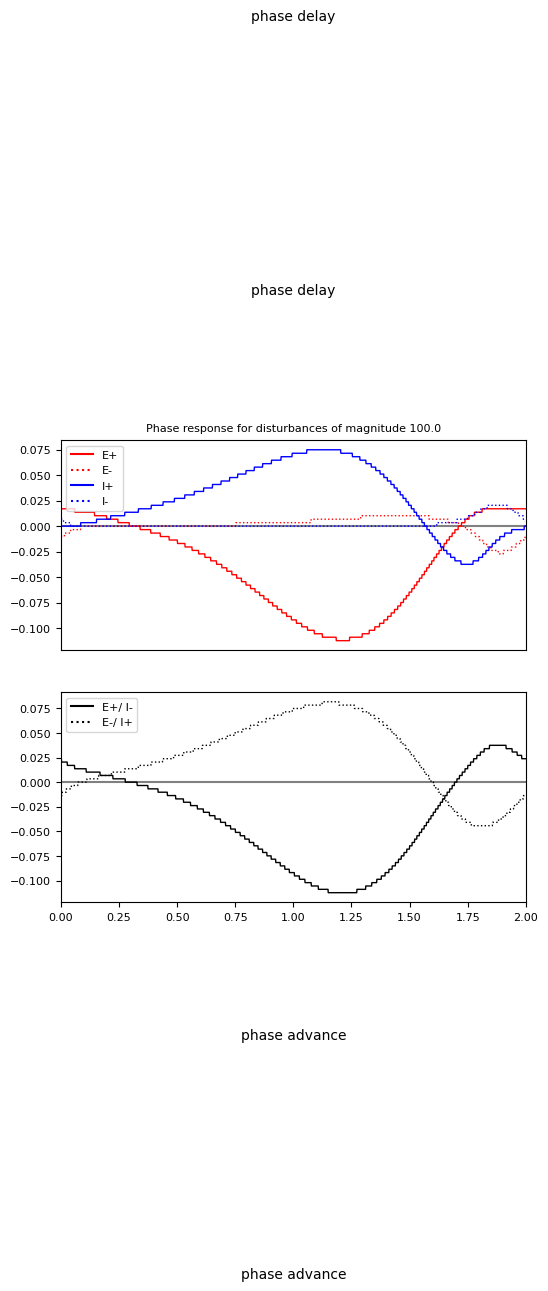

In [ ]:
dt= 0.01

min0 = scipy.signal.find_peaks(-ep[0])[0]
print("advance E+ max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(10. * ep[0])[0]
print("delay E+ max = ", 2.*min0*dt/period)

min0 = scipy.signal.find_peaks(-em[0])[0]
print("advance E- max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(em[0])[0]
print("delay E- max = ", 2.*min0*dt/period)

min0 = scipy.signal.find_peaks(-ip[0])[0]
print("advance I+ max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(ip[0])[0]
print("delay I+ max = ", 2.*min0*dt/period)

min0 = scipy.signal.find_peaks(-im[0])[0]
print("advance I- max = ", 2.*min0*dt/period)
min0 = scipy.signal.find_peaks(im[0])[0]
print("delay I- max = ", 2.*min0*dt/period)

plot_pcr(ep, em, ip, im, epim, emip, dist_array, period, "prc.png", savepath)

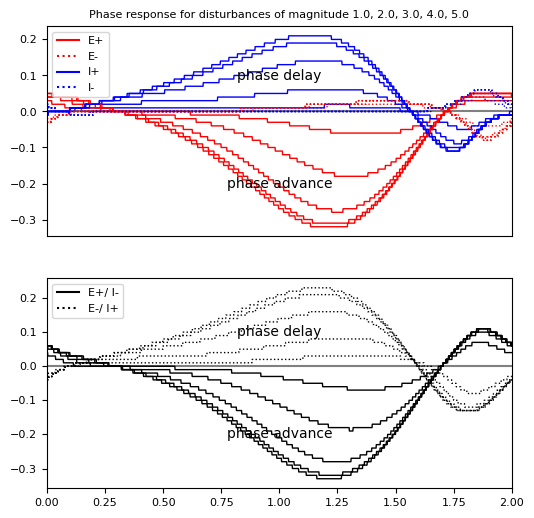

In [8]:
plot_pcr(ep, em, ip, im, epim, emip, dist_array, period, "prc.png", savepath)

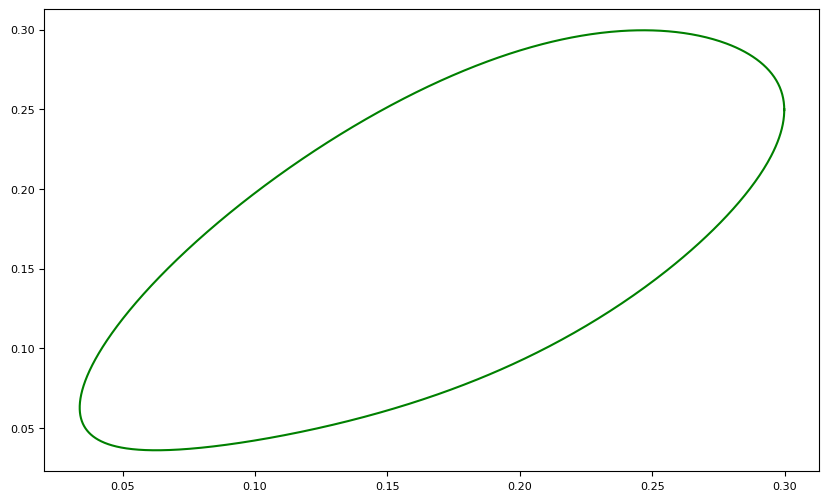

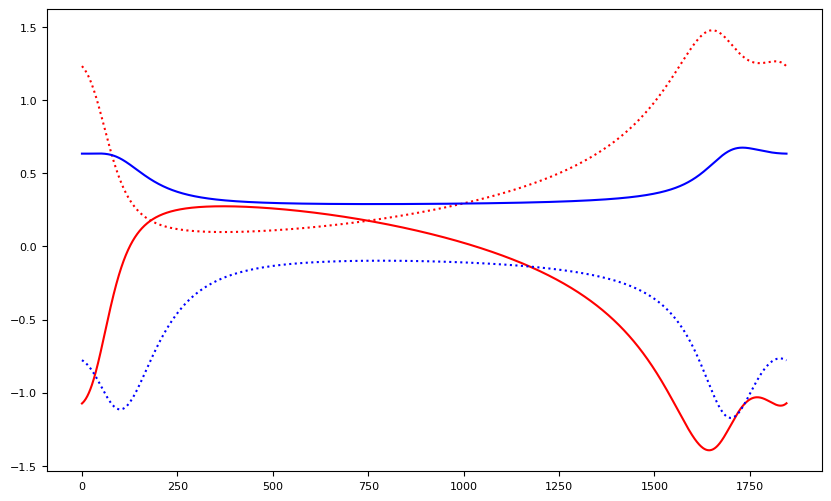

In [13]:
dt = 0.01
duration = 200.0
zero_input = np.zeros(((1, np.around(duration / dt).astype(int) + 1)))

wc = WCModel()
wc.params["duration"] = duration
wc.params.dt = dt
wc.params.sigma_ou = 0.0

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input + 0.

wc.run()
peaks0 = scipy.signal.find_peaks(wc.exc[0, :])[0]
p_list = []
for i in range(3, len(peaks0)):
    p_list.append(peaks0[i] - peaks0[i - 1])
period = np.mean(p_list) * dt

i0, i1 = 0, 0
for i in range(len(peaks0)):
    if peaks0[i] > 100 / dt:
        i0 = peaks0[i]
        i1 = peaks0[i + 1]
        break

trajectory = np.array([wc.exc[0,i0:i1+2], wc.inh[0,i0:i1+2]])

plt.plot(trajectory[0,:], trajectory[1,:], color="green")
plt.show()

jac_function = np.zeros(( 2, 2, ep.shape[1] ))

for t in range(jac_function.shape[2]):
    jac_function[:,:,t] = jacobian_wc(
                    wc.params.tau_exc,
                    wc.params.tau_inh,
                    wc.params.a_exc,
                    wc.params.a_inh,
                    wc.params.mu_exc,
                    wc.params.mu_inh,
                    wc.params.c_excexc,
                    wc.params.c_inhexc,
                    wc.params.c_excinh,
                    wc.params.c_inhinh,
                    trajectory[0,t],
                    trajectory[1,t],
                    [1., 0.],
                )

plt.plot(jac_function[0,0,:], color="red")
plt.plot(jac_function[0,1,:], color="red", linestyle=":")
plt.plot(jac_function[1,1,:], color="blue")
plt.plot(jac_function[1,0,:], color="blue", linestyle=":")

[-757.08715016    0.        ]


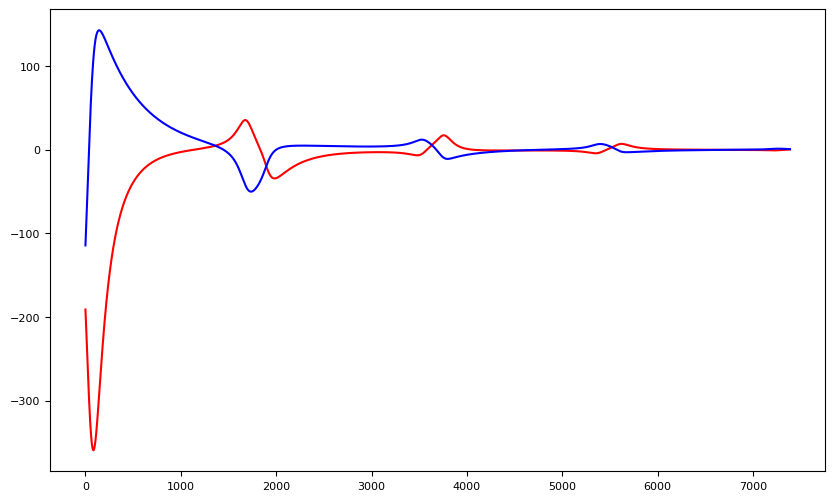

[-600.5406868     0.83333333]


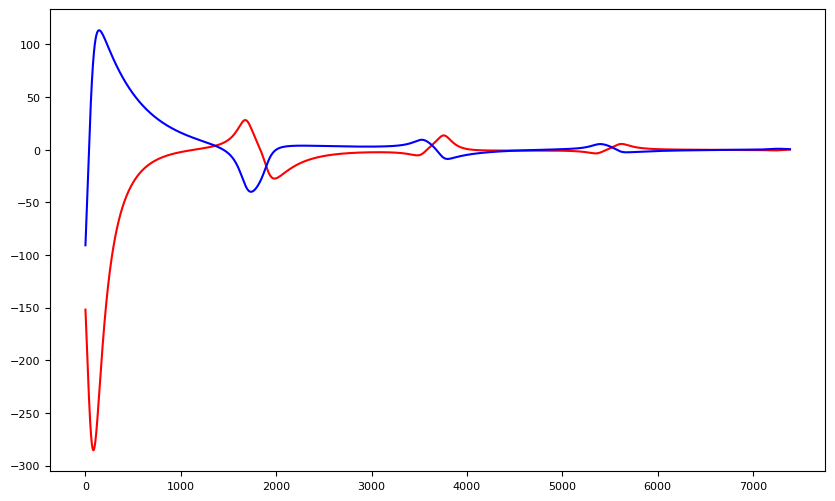

[-443.99422345    1.66666667]


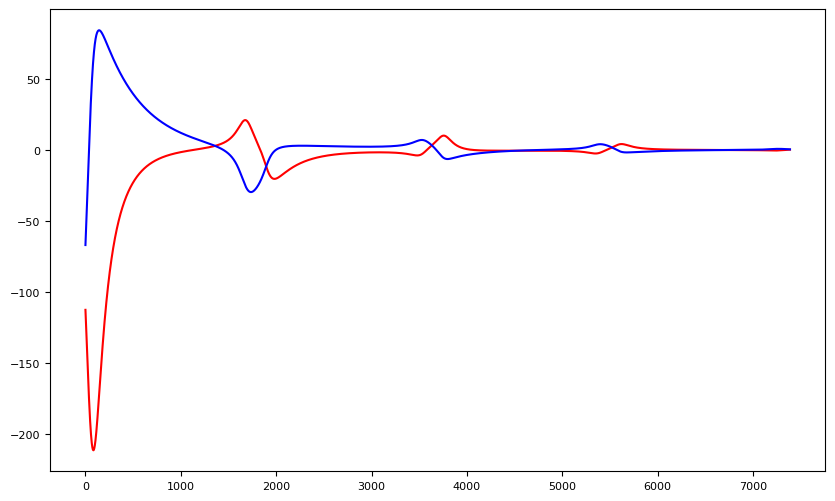

[-287.44776009    2.5       ]


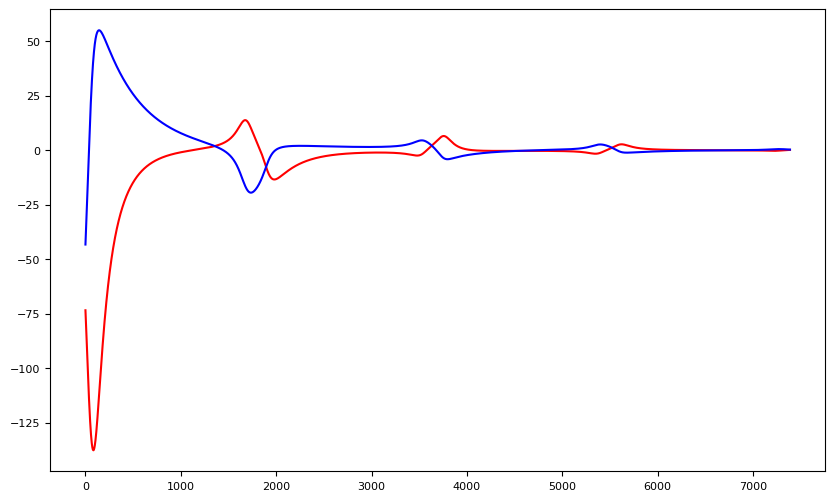

[-130.90129674    3.33333333]


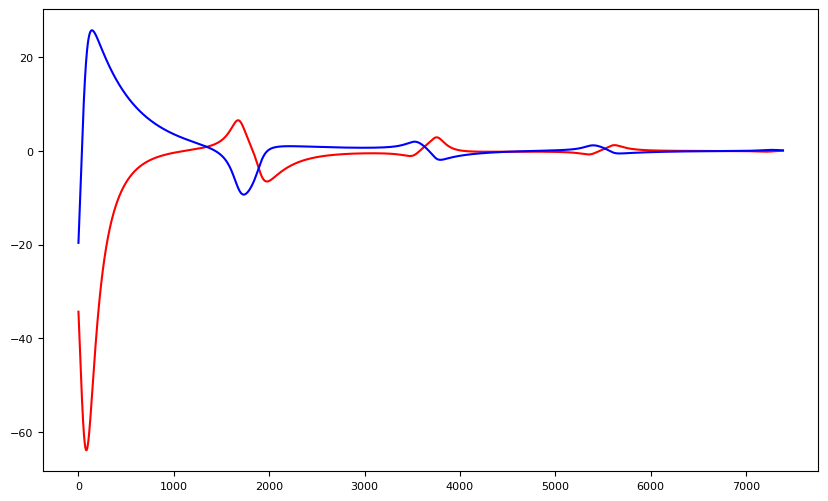

[25.64516662  4.16666667]


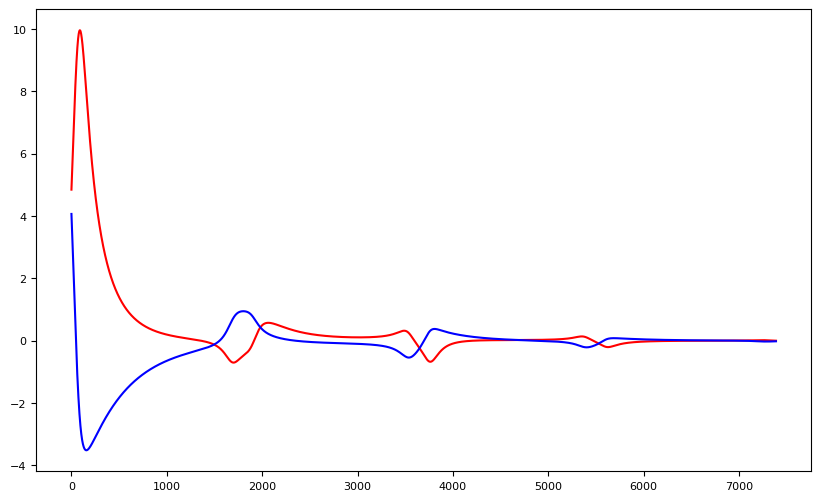

[182.19162997   5.        ]


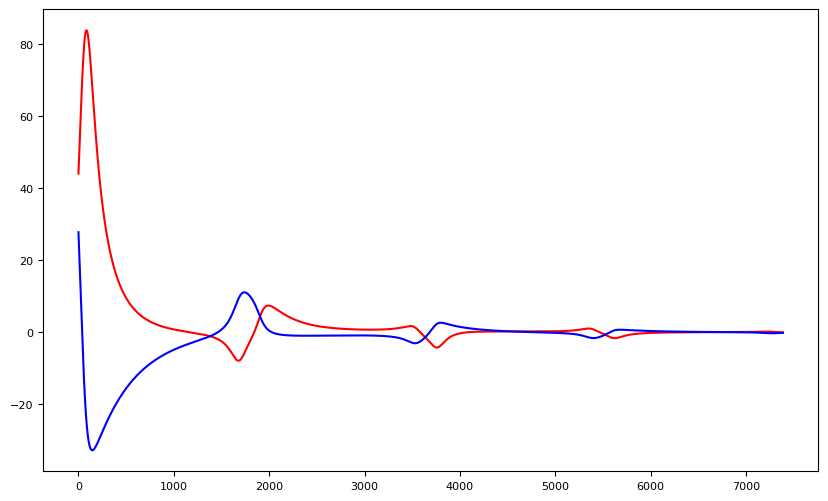

In [17]:

il = ep.shape[1]
Z = np.zeros((2, il*5))

F0 = F(wc.params.tau_exc,
                        wc.params.tau_inh,
                        wc.params.a_exc,
                        wc.params.a_inh,
                        wc.params.mu_exc,
                        wc.params.mu_inh,
                        wc.params.c_excexc,
                        wc.params.c_inhexc,
                        wc.params.c_excinh,
                        wc.params.c_inhinh,
                        trajectory[0,0],
                        trajectory[1,0],
                        [1., 0.],
                        )

Z10 = np.linspace(0., 5., 7)

for z10 in Z10:
    Z[1,0] = z10
    Z[0,0] = ( (2.*np.pi/period) - (z10 * F0[1])) / F0[0]

    print(Z[:,0])

    for t in range(1, il):
        Z[0,t] = Z[0,t-1] + (-dt) * (jac_function[0,0,t-1]*Z[0,t-1] + jac_function[1,0,t-1]*Z[1,t-1])
        Z[1,t] = Z[1,t-1] + (-dt) * (jac_function[0,1,t-1]*Z[0,t-1] + jac_function[1,1,t-1]*Z[1,t-1])

    for k in range(1,5):
        for t in range(k*il, (k+1)*il, 1):
            Z[0,t] = Z[0,t-1] + (-dt) * (jac_function[0,0,t-1-k*il]*Z[0,t-1] + jac_function[1,0,t-1-k*il]*Z[1,t-1])
            Z[1,t] = Z[1,t-1] + (-dt) * (jac_function[0,1,t-1-k*il]*Z[0,t-1] + jac_function[1,1,t-1-k*il]*Z[1,t-1])

    plt.plot(Z[0,il:], color="red")
    plt.plot(Z[1,il:], color="blue")
    plt.show()


In [11]:
def S(x, a, mu):
    return 1.0 / (1.0 + np.exp(-a * (x - mu)))

def S_der(x, a, mu):
    return (a * np.exp(-a * (x - mu))) / (1.0 + np.exp(-a * (x - mu))) ** 2

def jacobian_wc(
    tau_exc, tau_inh, a_exc, a_inh, mu_exc, mu_inh, c_excexc, c_inhexc, c_excinh, c_inhinh, e, i, point
):
    jacobian = np.zeros((2,2))
    input_exc = c_excexc * e - c_inhexc * i + point[0]
    jacobian[0, 0] = (
        -(-1.0 - S(input_exc, a_exc, mu_exc) + (1.0 - e) * c_excexc * S_der(input_exc, a_exc, mu_exc)) / tau_exc
    )
    jacobian[0, 1] = -((1.0 - e) * (-c_inhexc) * S_der(input_exc, a_exc, mu_exc)) / tau_exc
    input_inh = c_excinh * e - c_inhinh * i + point[1]
    jacobian[1, 0] = -((1.0 - e) * c_excinh * S_der(input_inh, a_inh, mu_inh)) / tau_inh
    jacobian[1, 1] = (
        -(-1.0 - S(input_inh, a_inh, mu_inh) + (1.0 - i) * (-c_inhinh) * S_der(input_inh, a_inh, mu_inh)) / tau_inh
    )
    return jacobian

def F(tau_exc, tau_inh, a_exc, a_inh, mu_exc, mu_inh, c_excexc, c_inhexc, c_excinh, c_inhinh, e, i, point):
    f = np.zeros((2))
    input_exc = c_excexc * e - c_inhexc * i + point[0]
    f[0] = (-e + (1.-e)*S(input_exc, a_exc, mu_exc))/tau_exc
    input_inh = c_excinh * e - c_inhinh * i + point[1]
    f[1] = (-i + (1.-i)*S(input_inh, a_inh, mu_inh))/tau_inh

    return f

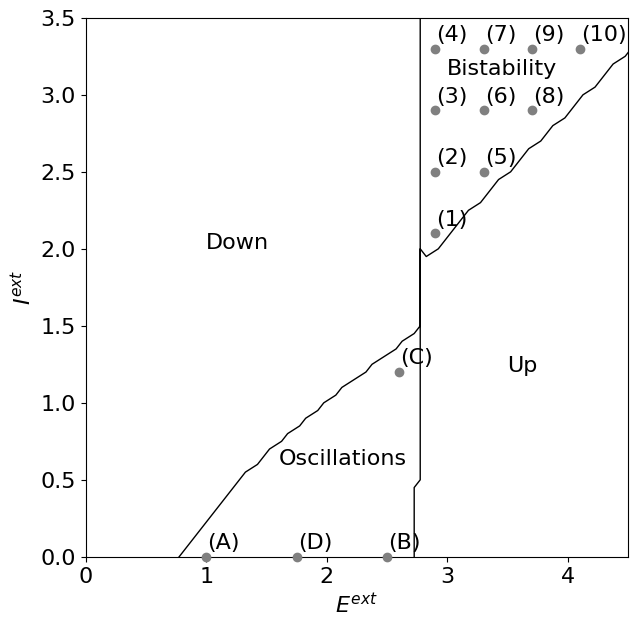

In [95]:
filehandler = open("../../../data/boundary_bi.pickle","rb")
boundary_bi = pickle.load(filehandler)
filehandler.close()
boundary_bi_e = boundary_bi[0]
boundary_bi_i = boundary_bi[1]

filehandler = open("../../../data/boundary_osc.pickle","rb")
boundary_LC = pickle.load(filehandler)
filehandler.close()
boundary_LC_e = boundary_LC[0]
boundary_LC_i = boundary_LC[1]

points = [[1., 0.], [2.5, 0.], [2.6, 1.2], [1.75, 0.]]
labels = ["(A)", "(B)", "(C)", "(D)"]

points_bi = [
    [2.9, 2.1], [2.9, 2.5], [2.9, 2.9], [2.9, 3.3],
    [3.3, 2.5], [3.3, 2.9], [3.3, 3.3],
    [3.7, 2.9], [3.7, 3.3],
    [4.1, 3.3],
]
labels_bi = []
for i in range(1, 12, 1):
    labels_bi.append("(" + str(i) + ")")

ms_ = 12

fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(boundary_LC_e, boundary_LC_i, color='black', linewidth=1)
ax.plot(boundary_bi_e, boundary_bi_i, color='black', linewidth=1)
ax.set_xlabel(r'$E^{ext}$')
ax.set_ylabel(r'$I^{ext}$')
ax.set_xlim(0,4.5)
ax.set_ylim(0,3.5)

for i in range(len(points)):
    p=points[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels[i], size=fs_)

for i in range(len(points_bi)):
    p=points_bi[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels_bi[i], size=fs_)

ax.text(1., 2., "Down", size=fs_)
ax.text(3.5, 1.2, "Up", size=fs_)
ax.text(1.6, 0.6, "Oscillations", size=fs_)
ax.text(3., 3.13, "Bistability", size=fs_)

fig.savefig(os.path.join(savepath, "statespace.png"))
plt.show()